## Import

In [ ]:
!pip install -r requirements.txt
!pip install deepchem
!pip install rdkit
!pip install pycm
!pip install pytorch-lightning wandb rdkit ogb
!pip install torch_geometric
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import deepchem as dc
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import Draw, rdFingerprintGenerator, AllChem
from rdkit.Chem.Descriptors import MolWt, TPSA, NumHDonors, NumHAcceptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

In [8]:
df=pd.read_csv('/content/Chemoinformatics_project/data/raw/sider.csv')

In [12]:
df.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1,1,0,0,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,0,1,1,1,0,0,...,0,1,1,0,0,0,1,0,1,0
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,1,1
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,0,1,1,1,1,0,1,...,0,1,1,1,0,0,1,0,1,0


## Pre-processing


Non-Numeric Columns (Categorical/Objects):
['smiles']


[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:01] WARNING: not removing hydrogen atom without neighbors
[14:27:02] WARNING: not removing hydrogen atom without neighbors
[14:27:02] WARNING: not removing hydrogen atom without neighbors
[14:27:02] WARNING: not removing hydrogen atom without neighbors
[14:27:02] WARNING: not removing hydrogen atom without neighbors
[14:27:02] WARNING: not r


--- SIDER Preprocessing Report ---

Final dataset size: (1427, 29)



,canonical_smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecule
0,NCCNCCNCCNCCN,1,1,0,0,1,1,1,0,0,...,0,1,1,0,0,1,1,1,0,
1,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,0,1,0,0,1,1,1,0,0,...,1,1,0,0,0,1,0,1,0,
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H...,0,1,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,
3,C#C[C@]1(O)CCC2C3CCC4=CC(=O)CCC4C3C(=C)CC21CC,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,0,0,1,1,
4,NC(=O)N1c2ccccc2CC(O)c2ccccc21,1,1,0,1,1,1,1,0,1,...,1,1,1,0,0,1,0,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@...,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,
1423,CC[C@H]1OC(=O)[C@H](C)C(=O)[C@H](C)[C@@H](O[C@...,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,
1424,CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,1,1,0,0,1,1,1,0,1,...,1,0,0,1,0,0,1,1,1,
1425,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,0,1,0,1,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,

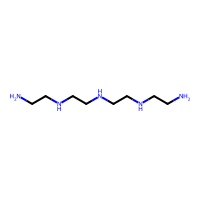
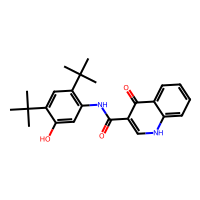
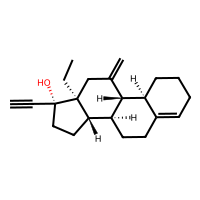
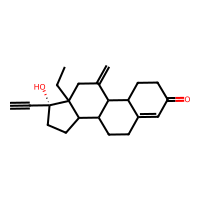
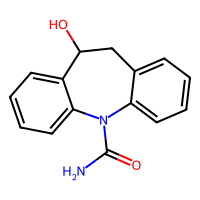
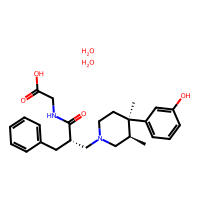
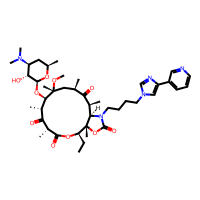
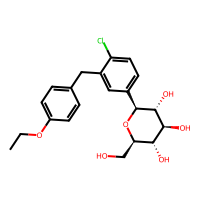
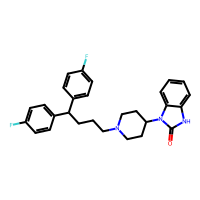
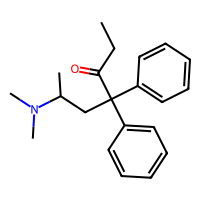

In [9]:
from Classification.src.sider_preprocessing import sider_preprocessing

df_cleaned = sider_preprocessing(df)

## Featurizer

In [10]:
from Classification.src.sider_featurizer import featurizer

df_final = featurizer(df=df_cleaned, mol_col='Molecule', fpSize=2048)

Feature engineering complete. Final DataFrame shape: (1427, 2085)
Total features added: 7 simple + 2048 Morgan = 2055


In [11]:
df_final.columns

Index(['canonical_smiles', 'Molecule', 'Hepatobiliary disorders',
       'Metabolism and nutrition disorders', 'Product issues', 'Eye disorders',
       'Investigations', 'Musculoskeletal and connective tissue disorders',
       'Gastrointestinal disorders', 'Social circumstances',
       ...
       'Morgan_2038', 'Morgan_2039', 'Morgan_2040', 'Morgan_2041',
       'Morgan_2042', 'Morgan_2043', 'Morgan_2044', 'Morgan_2045',
       'Morgan_2046', 'Morgan_2047'],
      dtype='object', length=2085)

##ACP and feature selection

Number of features before removing zero-variance: 2055
Number of features after removing zero-variance: 2049

--- Principal Component Analysis (PCA) ---


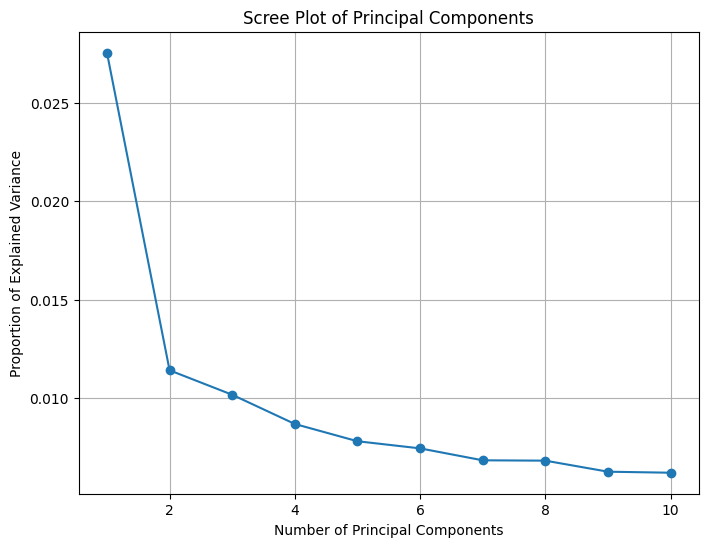


Cumulative Explained Variance by the first 10 components:
[0.02753344 0.03894617 0.04911743 0.05780498 0.06561605 0.07306551
 0.07990925 0.0867352  0.0930005  0.09921396]


In [ ]:
from Classification.src.sider_pca import analyze_pca_variance
analyze_pca_variance(df_final)

Why **PCA is Not an Effective Strategy Here**
My analysis showed that using PCA for dimensionality reduction is not a good idea for this dataset.

- Low Variance Captured: The scree plot shows that the first principal component (PC1) only explains about 2.7% of the total variance. This is extremely low, as a useful PCA would capture a much larger portion.

- Information is Spread Out: This indicates that the information is already distributed very evenly across our original features. In other words, there is very little redundancy for PCA to compress.

- Significant Information Loss: If we were to use the top 10 components, we would only capture about 10-12% of the total information. Using PCA here would mean throwing away the vast majority of our data.

Note on Feature Scaling
For distance-based models like SVMs and Logistic Regression, applying StandardScaler is crucial. It normalizes the features, which is important for these algorithms as they are sensitive to the scale of the input data.

## Models

In [19]:
X = df_final.iloc[:, 29:].copy()
y = df_final.iloc[:, 2:29]

X = X.select_dtypes(include=np.number)

# Apply VarianceThreshold to remove zero-variance features
selector = VarianceThreshold(threshold=0.0)
X_cleaned_array = selector.fit_transform(X)
X = pd.DataFrame(X_cleaned_array, columns=X.columns[selector.get_support()])

In [20]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Data split: {len(X_train)} training samples, {len(X_test)} testing samples.")

Data split: 1141 training samples, 286 testing samples.


In [ ]:
from Classification.sider_baseline_models.py import train_and_evaluate_models
train_and_evaluate_models(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test)


--- Optimizing Random Forest... ---
RF - Best Hyperparameters: {'estimator__max_depth': 10, 'estimator__n_estimators': 100}
--- Training XGBoost... ---
--- Training Logistic Regression... ---
--- Training SVM... (Warning: May be very slow) ---


--- EVALUATION AND RESULTS COLLECTION ---

                     MODEL PERFORMANCE SUMMARY (MACRO AUC-ROC)
                    Macro AUC-ROC                                               Hyperparameters
Random Forest              0.6691  {'estimator__max_depth': 10, 'estimator__n_estimators': 100}
XGBoost                    0.6596                                                      Defaults
Logistic Regression        0.6213                             C=1.0 (Default), Solver=liblinear
SVM                        0.6145                                Kernel=linear, C=1.0 (Default)

           DETAILED LABEL ANALYSIS (TOP 5 & BOTTOM 5 AUC-ROC ACROSS MODELS)

--- TOP 5 LABELS (Easiest Classes on Average) ---
                                   Labe

##UMAP

In [ ]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

# Scale the data once before creating the plots
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the UMAP projection
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X_scaled)

umap_df = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


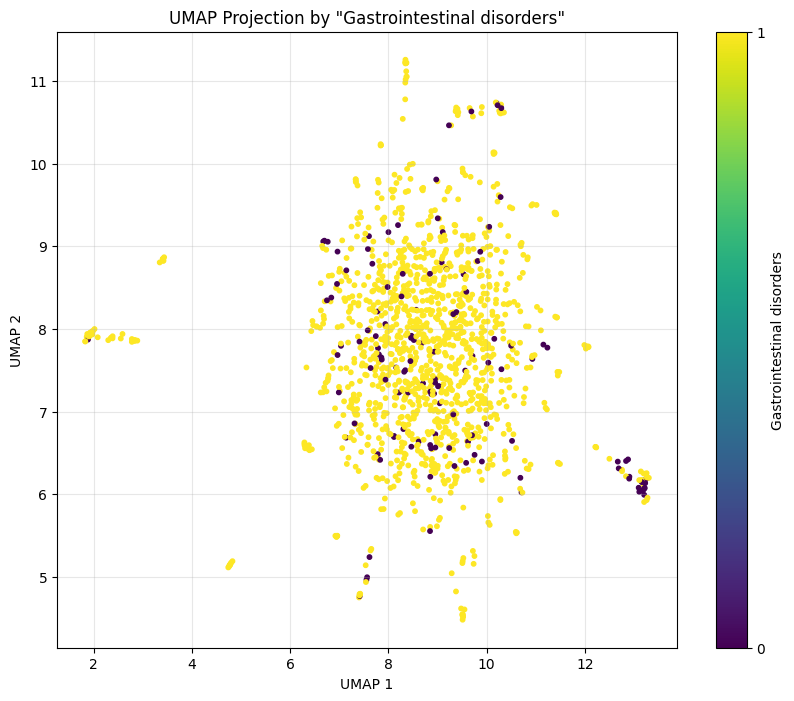

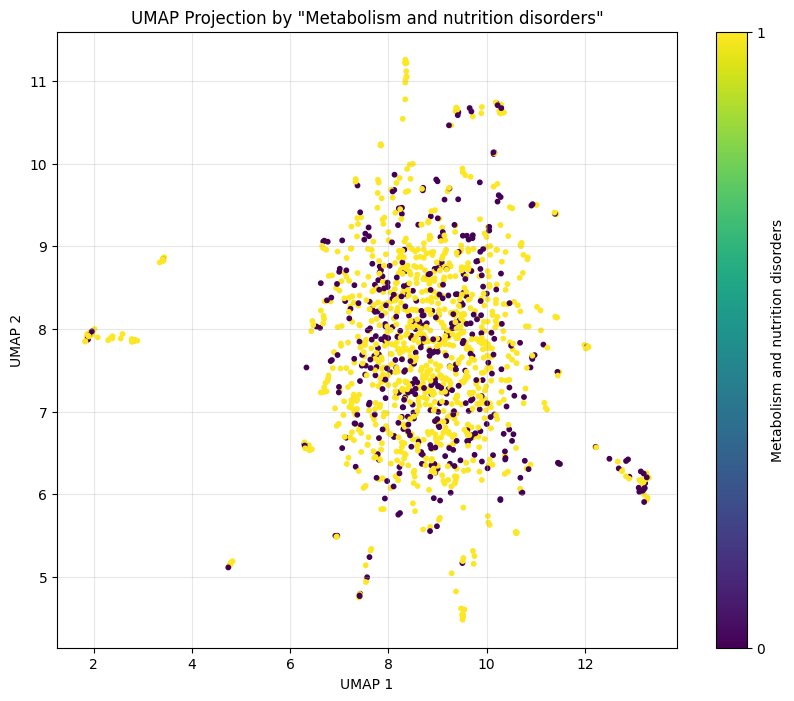

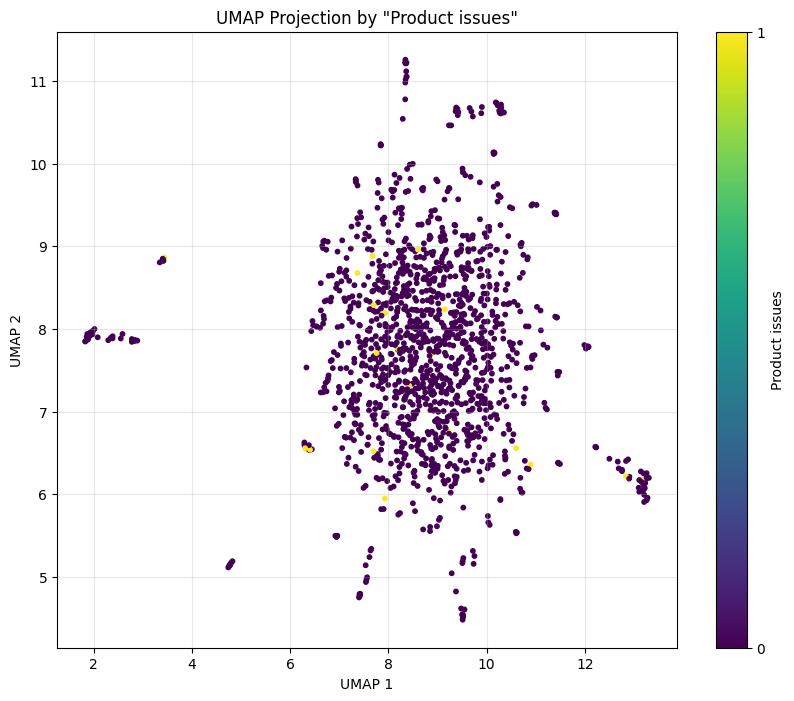

In [ ]:
# Plot interesting labels

from Classification.src.sider_umap import plot_umap

plot_umap(umap_df, y, 'Gastrointestinal disorders')
plot_umap(umap_df, y, 'Metabolism and nutrition disorders')
plot_umap(umap_df, y, 'Product issues')

1. High Performance: Gastrointestinal disorders
Observation: The plot is dominated by yellow dots (class 1), which confirms this is a highly prevalent side effect in the dataset.

Interpretation: Although the purple dots (class 0) do not form a single large cluster, they are not random. They group together in specific regions, indicating visual separability.

Conclusion: This clear, non-linear separation justifies why models like Random Forest were able to achieve high AUC-ROC scores (up to 0.76) for this label.

2. Low Performance: Metabolism and nutrition disorders
Observation: The plot shows a complete mix of yellow (class 1) and purple (class 0) dots. There is no discernible structure or clustering.

Interpretation: This visually represents a lack of a discriminating signal in the features. The Morgan fingerprints and descriptors do not seem to contain enough information to separate the classes for this specific label.

Conclusion: This directly explains why all models performed poorly, with AUC-ROC scores close to the random-guess baseline of 0.5.

3. Anomaly and Imbalance: Product issues
Observation: The UMAP plot is almost entirely purple (class 0), confirming that this is an extremely rare side effect. The few positive samples (yellow dots) are scattered without forming any clear cluster.

Interpretation: Given the extreme rarity of positive samples, the high AUC-ROC score of 0.7573 from XGBoost is highly suspect. There is no visual evidence of a pattern that would allow for such a strong classification.

Conclusion: The high score is likely a statistical artifact due to the very small number of positive samples in the test set. Therefore, the model's performance on this label should not be considered robust or reliable.

##SVM Optimization

Optimizing the SVM with a Non-Linear Kernel
My baseline results showed a clear pattern: tree-based models like Random Forest (Macro AUC-ROC of 0.66) significantly outperformed the linear models like Logistic Regression and the linear SVM (around 0.61).

This strongly suggested that the relationship between the molecular features and the side effects is non-linear.

The UMAP visualizations confirmed this hypothesis. For well-predicted labels, the classes formed distinct, non-linear clusters that couldn't be separated by a simple line. This visual evidence provided a strong reason to explore a more complex, non-linear SVM.

Optimization Strategy
Based on this, I decided to optimize an SVM using the RBF kernel to see if it could match the performance of the tree-based models.

Since SVMs are very slow to train, I used RandomizedSearchCV instead of an exhaustive GridSearchCV. This is a more efficient way to explore a wide range of hyperparameters (C and gamma) in a reasonable amount of time. If I had more time, a next step would be to try a more advanced technique like Bayesian Optimization.

Practical Challenge: Runtime
However, I ran into a major practical issue: the runtime.

Because this is a multi-label problem, the OneVsRestClassifier has to train 27 separate SVMs. With RandomizedSearchCV configured for 8 iterations and 3-fold cross-validation, this meant training a total of 648 models (27 * 8 * 3).

This process was too slow for a standard notebook environment. It's also worth noting that scikit-learn's SVM is CPU-bound, meaning a GPU would not have helped speed up this specific task. This experience showed that while powerful, SVMs can be impractical for hyperparameter tuning on complex, multi-label datasets like this one.

In [ ]:
from Classification.src.sider_svm_optimization import optimize_svm

# RandomizedSearchCV on non RBF SVM
best_svm_model = optimize_svm(X_train_scaled, y_train)

## GNN and Deep Learning

In [ ]:
# RUN THE TRAINING AND EVALUATION PIPELINE

from sklearn.model_selection import train_test_split
from torch_geometric.loader import DataLoader
import pytorch_lightning as pl
from Classification.src.sider_gnn import SIDERGraphDataset, MPNN_SIDER

sider_dataset = SIDERGraphDataset(root='./sider_pyg', df=df_cleaned)

# Split the dataset
# We split the list of graph objects, not X and y matrices.
train_data, test_data = train_test_split(
    sider_dataset, train_size=0.8, random_state=0, shuffle=True
)
train_data, val_data = train_test_split(
    train_data, train_size=0.9, random_state=42, shuffle=True # 10% of train for validation
)

# DataLoaders handle batching of graphs for the model
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Initialize and Train the Model
gnn_model = MPNN_SIDER(hidden_dim=64, out_dim=27, lr=0.001)

# PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=50, log_every_n_steps=10)
trainer.fit(model=gnn_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

# Evaluation
trainer.test(model=gnn_model, dataloaders=test_loader)

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type        | Params | Mode 
-------------------------------------------------
0 | atom_emb | AtomEncoder | 11.1 K | train
1 | bond_emb | BondEncoder | 832    | train
2 | conv     | NNConv      | 541 K  | train
3 | gru      | GRU         | 25.0 K | train
4 | mlp      | MLP         | 3.0 K  | train
-------------------------------------------------
581 K     Trainable params
0         Non-trainable params
581 K     Total params
2.324     Total est

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


Testing: |          | 0/? [00:00<?, ?it/s]


Final GNN Performance: Macro AUC-ROC = 0.6408


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_macro_auc       │    0.6408321857452393     │
└───────────────────────────┴───────────────────────────┘

[{'test_macro_auc': 0.6408321857452393}]

## Bayesian Optimization

In [13]:
from sklearn.model_selection import train_test_split
from torch_geometric.loader import DataLoader
import pytorch_lightning as pl
from Classification.src.sider_gnn import SIDERGraphDataset, MPNN_SIDER

sider_dataset = SIDERGraphDataset(root='./sider_pyg', df=df_cleaned)

# Split the dataset
# We split the list of graph objects, not X and y matrices.
train_data, test_data = train_test_split(
    sider_dataset, train_size=0.8, random_state=0, shuffle=True
)
train_data, val_data = train_test_split(
    train_data, train_size=0.9, random_state=42, shuffle=True # 10% of train for validation
)

# DataLoaders handle batching of graphs for the model
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
from Classification.src.sider_gnn_bayesian_opti import objective

import optuna

!wandb login

# Minimize the validation loss
study = optuna.create_study(direction="minimize")
study.optimize(
    lambda trial: objective(trial, train_loader, val_loader),
    n_trials=10)
# A trial = one test with a single combination of hyperparameters by training your GNN for the maximum of epochs

print("\n--- Bayesian Optimization Complete ---")
print(f"Best validation loss: {study.best_value:.4f}")
print("Best hyperparameters found:", study.best_params)

In [16]:
completed_trials = len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])

if completed_trials > 0:
    print(f"{completed_trials} trials were completed before stopping.")

    print("\nBest hyperparameters found so far:")
    print(study.best_params)

    print(f"\nBest validation loss so far: {study.best_value:.4f}")
else:
    print("No trials were completed before stopping.")

2 trials were completed before stopping.

Best hyperparameters found so far:
{'lr': 0.001969509231324117, 'hidden_dim': 128}

Best validation loss so far: 0.5285


In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint

best_params = study.best_params
print("Best hyperparameters found by Bayesian Optimization:")
print(best_params)

final_gnn_model = MPNN_SIDER(
    hidden_dim=best_params['hidden_dim'],
    out_dim=27,
    lr=best_params['lr']
)

# save the best version of this final model
final_checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="final_model_checkpoints/",
    filename="best-final-gnn-model",
    save_top_k=1,
    mode="min"
)

final_trainer = pl.Trainer(
    max_epochs=50,
    callbacks=[final_checkpoint_callback],
    accelerator="auto"
)

print("\n--- Training the final GNN model with the best hyperparameters... ---")

# Train the final model
final_trainer.fit(model=final_gnn_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

print("\n--- Final evaluation on the test set... ---")
final_trainer.test(model=final_gnn_model, dataloaders=test_loader, ckpt_path="best")

In [22]:
checkpoint_path = "final_model_checkpoints/best-final-gnn-model.ckpt"

best_model_from_checkpoint = MPNN_SIDER.load_from_checkpoint(
    checkpoint_path,
    hidden_dim=best_params['hidden_dim'], # Use the value found from optimization
    out_dim=27
)

test_trainer = pl.Trainer()
test_trainer.test(model=best_model_from_checkpoint, dataloaders=test_loader)

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Testing: |          | 0/? [00:00<?, ?it/s]


Final GNN Performance: Macro AUC-ROC = 0.5886


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_macro_auc       │     0.588571310043335     │
└───────────────────────────┴───────────────────────────┘

[{'test_macro_auc': 0.588571310043335}]

## Use a pre-trained Transformer

In [25]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel
import pandas as pd
from tqdm import tqdm

def get_chemberta_embeddings(smiles_list):
    """
    Generates embeddings for a list of SMILES strings using a pretrained ChemBERTa model.
    """
    tokenizer = AutoTokenizer.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")
    model = AutoModel.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")

    model.eval()

    all_embeddings = []

    for smiles in tqdm(smiles_list):
        inputs = tokenizer(smiles, return_tensors="pt", padding=True, truncation=True, max_length=128)

        # Get embeddings without calculating gradients for faster inference
        with torch.no_grad():
            outputs = model(**inputs)

        # Use the representation of the [CLS] token, which summarizes the entire molecule
        embedding = outputs.last_hidden_state[0, 0, :].numpy()
        all_embeddings.append(embedding)

    return np.array(all_embeddings)

In [ ]:
X_transformer_features = get_chemberta_embeddings(df_cleaned['canonical_smiles'].tolist())

In [39]:
print(f"Shape of the feature matrix (X): {X_transformer_features.shape}")

Shape of the feature matrix (X): (1427, 768)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, classification_report, roc_auc_score

y = df_final.iloc[:, 2:29]
X_train, X_test, y_train, y_test = train_test_split(X_transformer_features, y, test_size=0.2, random_state=42)

# Choose the best parameters from grid search
base_classifier = RandomForestClassifier(max_depth=50, n_estimators=100, random_state=42, class_weight='balanced')

multi_label_model = MultiOutputClassifier(estimator=base_classifier)

print("Training the multi-label model")
multi_label_model.fit(X_train, y_train)

# 1. Get the list of probability arrays
y_pred_proba_list = multi_label_model.predict_proba(X_test)

# 2. Reshape the probabilities into a proper 2D DataFrame
# We iterate through the list and extract the probability of the positive class (column at index 1) for each label.
y_pred_proba_df = pd.DataFrame({
    y_test.columns[i]: proba[:, 1]
    for i, proba in enumerate(y_pred_proba_list)
})

# 3. Calculate metrics
predictions = multi_label_model.predict(X_test)
loss = hamming_loss(y_test, predictions)

# Use the correctly formatted probabilities DataFrame for roc_auc_score
roc_auc_macro = roc_auc_score(y_test, y_pred_proba_df, average='macro')
roc_auc_micro = roc_auc_score(y_test, y_pred_proba_df, average='micro')

print(f"\nHamming Loss: {loss:.4f}")
print(f"ROC AUC Score (Macro Average): {roc_auc_macro:.4f}")
print(f"ROC AUC Score (Micro Average): {roc_auc_micro:.4f}")

Training the multi-label model

Hamming Loss: 0.2396
ROC AUC Score (Macro Average): 0.6070
ROC AUC Score (Micro Average): 0.8190


In [53]:
print(classification_report(y_test, predictions, target_names=y.columns))

                                                                     precision    recall  f1-score   support

                                            Hepatobiliary disorders       0.66      0.65      0.66       155
                                 Metabolism and nutrition disorders       0.70      0.94      0.80       195
                                                     Product issues       0.00      0.00      0.00         7
                                                      Eye disorders       0.66      0.85      0.74       177
                                                     Investigations       0.83      0.99      0.91       238
                    Musculoskeletal and connective tissue disorders       0.76      0.90      0.82       215
                                         Gastrointestinal disorders       0.92      0.99      0.96       263
                                               Social circumstances       0.00      0.00      0.00        42
                  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
